### Àlex Correa Orri 1564967
### Júlia Pumares Benaiges 1566252

#### Dataset explicat: https://rpubs.com/rhuebner/hrd_cb_v14
#### Descàrrega dataset: https://www.kaggle.com/rhuebner/human-resources-data-set

In [152]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import os
import seaborn as sns
from scipy.stats import spearmanr
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
### DIRECTORI DE TREBALL

In [4]:
os.getcwd()
#path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/pràctiques/PRÀCTICA 1'
path = 'C:/Users/julia/Documents/JULIA/UNI/3r/Aprenentatge_computacional/Prac1'
os.chdir(path)
os.getcwd()
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### LECTURA DE DADES

In [5]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('HRDataset_v14.csv')
data = dataset.values

x = data[:, :311]
y = data[:, 9]

### INFORMACIÓ DE LES DADES

In [6]:
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

#print("Per comptar el nombre de valors no existents:")
#print(dataset.isnull().sum())
#print("Print dataset:")
#print(dataset)
#dataset.describe()
#list(dataset.columns)

Dimensionalitat de la BBDD: (311, 36)
Dimensionalitat de les entrades X (311, 36)
Dimensionalitat de l'atribut Y (311,)


### MODIFICACIÓ DEL DATASET

#### ELiminem atributs

In [7]:
dataset = dataset.drop(['EmpID','Employee_Name', 'MarriedID', 'DeptID', 'Zip', 'ManagerID', 'LastPerformanceReview_Date', 'MaritalStatusID', 'EmpStatusID', 'PositionID', 'Sex', 'PerformanceScore'], axis=1) 
dataset.HispanicLatino = dataset.HispanicLatino.replace({'No': 0, 'Yes': 1, 'no':0, 'yes':1})

#### Modifiquem atributs de dates a valors numèrics en dies

In [8]:
def date2date(list_dates):
    list_dates_def = []
    for date in list_dates:
        if (len(date.split('/')[2]) == 2):
            s = date.split('/')
            s[2] = '19'+s[2]
            date = s[0]+'/'+s[1]+'/'+s[2]
        list_dates_def.append(date)
    return list_dates_def

In [9]:
today = '1/1/2020'
#passem les dates (date of hire i date of termination) a date_time
dataset['DateofHire'] = pd.to_datetime(dataset['DateofHire'], format='%m/%d/%Y')
dataset['DateofTermination'].fillna(today, inplace = True) #posem 2020 com a data actual o de referència
dataset['DateofTermination'] = pd.to_datetime(dataset['DateofTermination'], format='%m/%d/%Y')
dataset['WorkedDays'] = (dataset['DateofTermination'] - dataset['DateofHire']).astype('timedelta64[D]')
dataset = dataset.drop(['DateofTermination', 'DateofHire'], axis=1)
#passem DOB a datetime i ho transformem a edat (per tenir una valor numèric)
dataset['DOB'] = date2date(dataset['DOB'])
dataset['DOB'] = pd.to_datetime(dataset['DOB'], format='%m/%d/%Y')
dataset['Age'] = (pd.to_datetime(today, format='%m/%d/%Y') - dataset['DOB']).astype('timedelta64[D]')
dataset = dataset.drop(['DOB'], axis=1)

#### Passem les columnes categòriques a binàries

In [10]:
columns = ['CitizenDesc', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'RecruitmentSource', 'Position', 'State', 'ManagerName', 'MaritalDesc']

for col in columns:
    if dataset[col].dtype == 'object':
        dataset = pd.concat([dataset, pd.get_dummies(dataset[col], prefix=col)], axis=1)


In [11]:
dataset = dataset.drop(['CitizenDesc', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'RecruitmentSource', 'Position', 'State', 'ManagerName', 'MaritalDesc'], axis=1) 

In [12]:
data = dataset.values
x = data[:, :311]
y = data[:, 3]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (311, 144)
Dimensionalitat de les entrades X (311, 144)
Dimensionalitat de l'atribut Y (311,)


In [13]:
dataset.describe()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,HispanicLatino,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,...,ManagerName_Lynn Daneault,ManagerName_Michael Albert,ManagerName_Peter Monroe,ManagerName_Simon Roup,ManagerName_Webster Butler,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed
count,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,...,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000
mean,0.434,2.977,0.093,69020.685,0.334,0.090,4.110,3.891,1.219,0.415,...,0.042,0.071,0.045,0.055,0.068,0.096,0.399,0.039,0.441,0.026
std,0.496,0.587,0.291,25156.637,0.473,0.287,0.790,0.909,2.349,1.295,...,0.200,0.257,0.208,0.228,0.251,0.296,0.490,0.193,0.497,0.159
min,0.000,1.000,0.000,45046.000,0.000,0.000,1.120,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,3.000,0.000,55501.500,0.000,0.000,3.690,3.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,3.000,0.000,62810.000,0.000,0.000,4.280,4.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,3.000,0.000,72036.000,1.000,0.000,4.700,5.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
max,1.000,4.000,1.000,250000.000,1.000,1.000,5.000,5.000,8.000,6.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### DISTRIBUCIÓ DE LES DADES

In [19]:
#Normallity tests
#HISTOGRAMA
from scipy.stats import shapiro
c = 0
for col in dataset.columns:
    stat, p = shapiro(x[:,c])
    #if p > 0.05:
    print(c)
    print(dataset.columns[c])
    print(p)
    c += 1

0
GenderID
2.2409765845482527e-25
1
PerfScoreID
1.529087919337566e-25
2
FromDiversityJobFairID
3.715741463305891e-32
3
Salary
1.1153204989966881e-23
4
Termd
2.407652170243522e-26
5
HispanicLatino
2.824326775131712e-32
6
EngagementSurvey
2.2056231081986344e-13
7
EmpSatisfaction
3.660982938895983e-17
8
SpecialProjectsCount
2.090122598087042e-27
9
DaysLateLast30
1.2442778150134783e-31
10
Absences
4.820368548763554e-10
11
WorkedDays
0.012815523892641068
12
Age
4.546484369538639e-11
13
CitizenDesc_Eligible NonCitizen
1.7582061859790886e-34
14
CitizenDesc_Non-Citizen
5.645573494481049e-36
15
CitizenDesc_US Citizen
7.292158083161944e-34
16
RaceDesc_American Indian or Alaska Native
3.315233788908154e-36
17
RaceDesc_Asian
3.715741463305891e-32
18
RaceDesc_Black or African American
1.1925236882059268e-27
19
RaceDesc_Hispanic
9.524946279104419e-37
20
RaceDesc_Two or more races
1.2039531379323172e-34
21
RaceDesc_White
1.2607019086823063e-25
22
TermReason_Another position
2.6885067415572476e-33
23


1.1153204989966881e-23


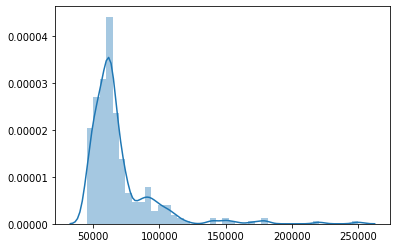

In [15]:
# Normality test per l'atribut v
v = 3
ax = sns.distplot(x[:,v])
stat, p = shapiro(x[:,v])
print(p)

In [16]:
#Desprès de realitzar testos de normalitat amb tots els atributs, no hem trobta cap atribut que seguis una distribució gaussiana.

### CORRELACIÓ ENTRE ELS ATRIBUTS

In [17]:
i=0
for col in dataset.columns:
    s, p = spearmanr(x[:,i], y)
    if (s > 0.20 and p < 0.05):
        print(col)
        print(spearmanr(x[:,i], y))
        print("-----------------------------------------------------------------------------------")
    i = i + 1
#p-value < 0.05 la correlació és significant

Salary
SpearmanrResult(correlation=1.0, pvalue=0.0)
-----------------------------------------------------------------------------------
SpecialProjectsCount
SpearmanrResult(correlation=0.5068658370578706, pvalue=1.0553505548976915e-21)
-----------------------------------------------------------------------------------
Department_IT/IS
SpearmanrResult(correlation=0.45549509683872375, pvalue=2.4568735599478076e-17)
-----------------------------------------------------------------------------------
Department_Software Engineering
SpearmanrResult(correlation=0.2596308027361501, pvalue=3.483878478807133e-06)
-----------------------------------------------------------------------------------
Position_Software Engineer
SpearmanrResult(correlation=0.2523599832360929, pvalue=6.617580179633956e-06)
-----------------------------------------------------------------------------------
ManagerName_Alex Sweetwater
SpearmanrResult(correlation=0.24377744854206668, pvalue=1.3768822937162497e-05)
--------

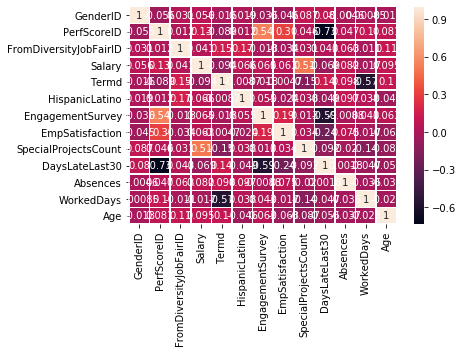

In [18]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
dataset1 = dataset.iloc[:,0:13]
correlacio = dataset1.corr()

plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [19]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset1)

Error in callback <function flush_figures at 0x00000243089B21E0> (for post_execute):


KeyboardInterrupt: 

Mitjana de salari de nois a l'empresa:  70629.4
Mitjana de salari de noies a l'empresa:  67786.72727272728
Màxim salari de nois a l'empresa:  178000
Màxim salari de noies a l'empresa:  250000


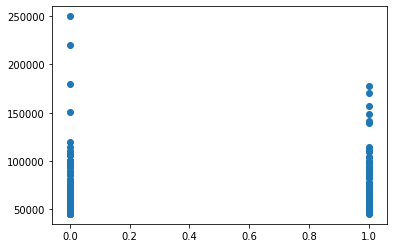

In [21]:
#correlació entre genderid i salary
plt.figure()

ax = plt.scatter(x[:,0], y)
print("Mitjana de salari de nois a l'empresa: ",dataset[dataset['GenderID'] == 1]['Salary'].mean())
print("Mitjana de salari de noies a l'empresa: ",dataset[dataset['GenderID'] == 0]['Salary'].mean())
print("Màxim salari de nois a l'empresa: ",dataset[dataset['GenderID'] == 1]['Salary'].max())
print("Màxim salari de noies a l'empresa: ",dataset[dataset['GenderID'] == 0]['Salary'].max())

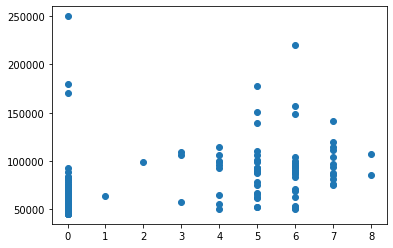

In [22]:
#correlació entre perfscoreid i salary
plt.figure()

ax = plt.scatter(x[:,8], y)

### HISTOGRAMA

#### Quantitat d'empleats segons el gènere

#### Quantitat de persones per rangs de salaris a continuació. Es veu com poques persones cobren molt i la majoria es troba en sous més baixos.

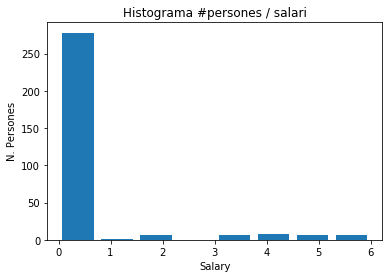

In [23]:
plt.figure()
plt.title("Histograma #persones / salari")
plt.xlabel("Salary")
plt.ylabel("N. Persones")
v = 9
hist = plt.hist(x[:,v], bins=8, range=[np.min(x[:,v]), np.max(x[:,v])], histtype="bar", rwidth=0.8)

### Apartat (B): Primeres regressions

In [34]:
#calcul MSE
def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])



1.0

In [35]:
def mse(v1, v2):
    return ((v1 - v2)**2).mean()
vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4])
mse(vector1, vector2)

1.0

In [36]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x)

In [39]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Mean squeared error:  625248204.3606042
R2 score:  0.008834939048487533


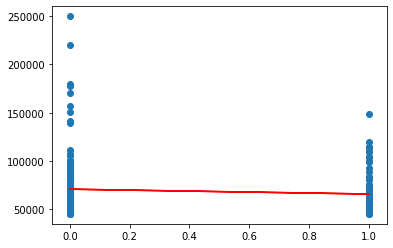

In [45]:
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
a = 4
atribut1 = x[:,a].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,a], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


In [ ]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

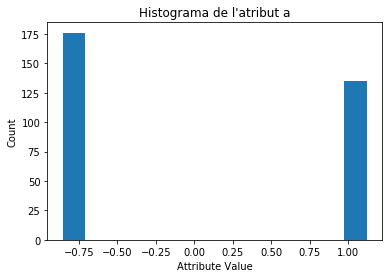

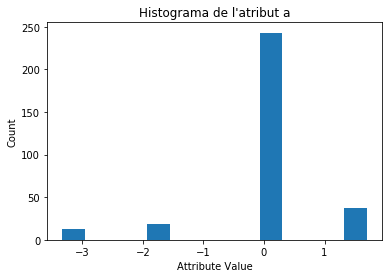

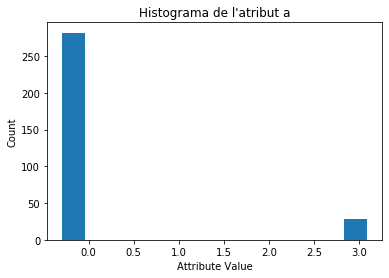

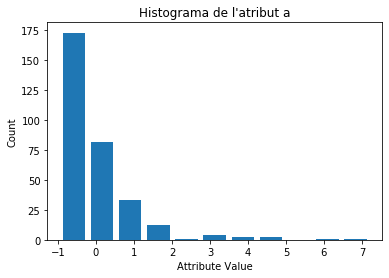

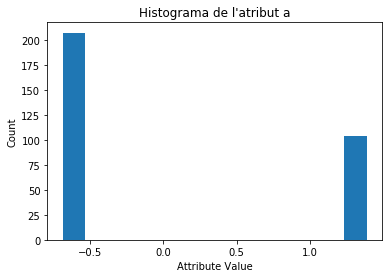

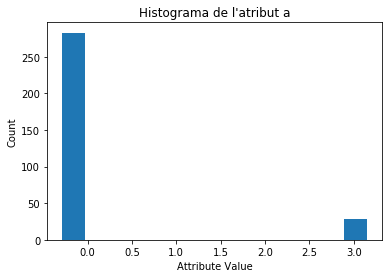

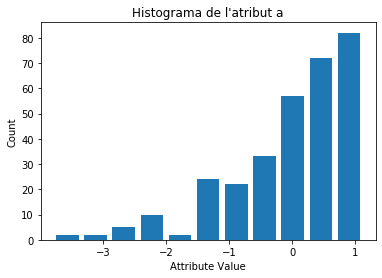

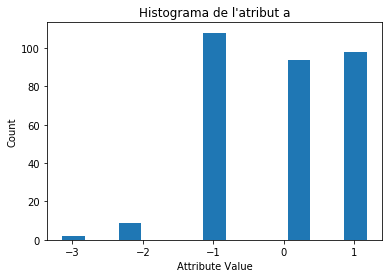

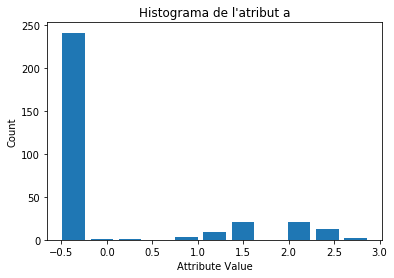

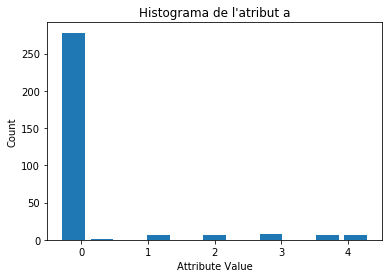

In [32]:
for a in range(10):
    plt.figure()
    plt.title("Histograma de l'atribut a")
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(x_t[:,a], bins=11, range=[np.min(x_t[:,a]), np.max(x_t[:,a])], histtype="bar", rwidth=0.8)